In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import linregress
from scipy.integrate import solve_bvp

In [7]:
def testosterone(t):
    return k 

def cortisol(t):
    return j 

def exercise(t):
    return -t*(t-30)

def sleep(t):
    return 1/(1+np.exp(-t)) - 1/2

def protein(t):
    return np.exp(-(t-1.6)**2)

Text(0, 0.5, 'Muscle Mass')

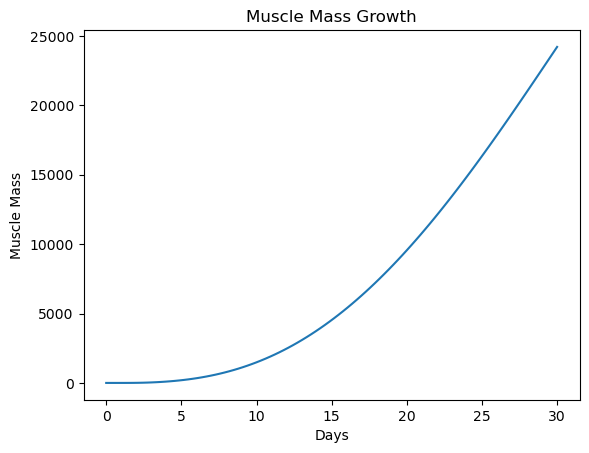

In [8]:
beta = .2
eps = .3
rho = .5
alpha = .5
k = 2
j = 2
r = .1
K = 1

def ode(t, x): 
    return (beta * x[1] * x[2] + eps * x[3] * (rho * x[4] - alpha * x[5]), np.exp(-(t-1.6)**2), -t*(t-30), 1/(1+np.exp(-t)) - 1/2, k, j)

y0 = np.array([.01, 1/24, .3, 1, .05, .05])
t = np.linspace(0, 30, 100)

soln = solve_ivp(ode, t_span=(0, 30), y0=y0, t_eval=t)

plt.plot(t, soln.y[0])
plt.title("Muscle Mass Growth")
plt.xlabel("Days")
plt.ylabel("Muscle Mass")

Text(0, 0.5, 'Muscle Mass')

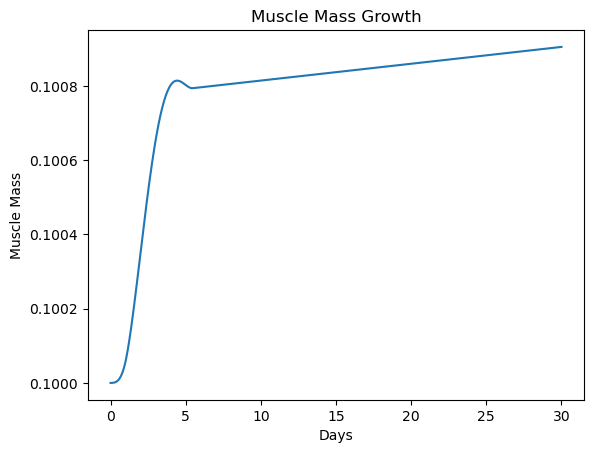

In [22]:
beta = .01
eps = .01
rho = .5
alpha = .5
k = 2
j = 2
r = .01
K = 1

def ode(t, x): 
    x0 = x[0] # initial muscle mass

    logistic_growth = r * x0 * (1 - x0 / K)
    
    physical_factors = beta * protein(t) * exercise(t) + eps * sleep(t) + (rho * testosterone(t) - alpha * cortisol(t))
    # I tweaked the model to have sleep add to hormones

    return [logistic_growth * physical_factors]

y0 = np.array([.1])
t = np.linspace(0, 30, 500)

soln = solve_ivp(ode, t_span=(0, 30), y0=y0, t_eval=t)

plt.plot(t, soln.y[0])
plt.title("Muscle Mass Growth")
plt.xlabel("Days")
plt.ylabel("Muscle Mass")